## Classification Code:

Train a model to classify the label/tag of each text post.  

Link: https://github.com/tensorflow/workshops/blob/master/extras/keras-bag-of-words/keras-bow-model.ipynb

In [0]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

In [2]:
import itertools
import os

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.preprocessing import LabelBinarizer, LabelEncoder
from sklearn.metrics import confusion_matrix

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.preprocessing import text, sequence
from keras import utils

# This code was tested with TensorFlow v1.4
print("You have TensorFlow version", tf.__version__)

You have TensorFlow version 1.15.0


Using TensorFlow backend.


In [3]:
data = pd.read_csv("https://storage.googleapis.com/tensorflow-workshop-examples/stack-overflow-data.csv")
data.head()

,post,tags
0,what is causing this behavior in our c# datet...,c#
1,have dynamic html load as if it was in an ifra...,asp.net
2,how to convert a float value in to min:sec i ...,objective-c
3,.net framework 4 redistributable just wonderi...,.net
4,trying to calculate and print the mean and its...,python


In [4]:
data['tags'].value_counts()

c#               2000
ruby-on-rails    2000
java             2000
c++              2000
.net             2000
iphone           2000
sql              2000
asp.net          2000
mysql            2000
android          2000
python           2000
c                2000
ios              2000
jquery           2000
css              2000
php              2000
objective-c      2000
javascript       2000
angularjs        2000
html             2000
Name: tags, dtype: int64

In [5]:
# Split data into train and test
train_size = int(len(data) * .8)
print ("Train size: %d" % train_size)
print ("Test size: %d" % (len(data) - train_size))

Train size: 32000
Test size: 8000


In [0]:
train_posts = data['post'][:train_size]
train_tags = data['tags'][:train_size]

test_posts = data['post'][train_size:]
test_tags = data['tags'][train_size:]

In [0]:
max_words = 1000
tokenize = text.Tokenizer(num_words=max_words, char_level=False)

In [0]:
tokenize.fit_on_texts(train_posts) # only fit on train
x_train = tokenize.texts_to_matrix(train_posts)
x_test = tokenize.texts_to_matrix(test_posts)

In [0]:
# Use sklearn utility to convert label strings to numbered index
encoder = LabelEncoder()
encoder.fit(train_tags)
y_train = encoder.transform(train_tags)
y_test = encoder.transform(test_tags)

In [0]:
# Converts the labels to a one-hot representation
num_classes = np.max(y_train) + 1
y_train = utils.to_categorical(y_train, num_classes)
y_test = utils.to_categorical(y_test, num_classes)

In [11]:
# Inspect the dimenstions of our training and test data (this is helpful to debug)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

x_train shape: (32000, 1000)
x_test shape: (8000, 1000)
y_train shape: (32000, 20)
y_test shape: (8000, 20)


In [0]:
# This model trains very quickly and 2 epochs are already more than enough
# Training for more epochs will likely lead to overfitting on this dataset
# You can try tweaking these hyperparamaters when using this model with your own data
batch_size = 32
epochs = 2

In [13]:
# Build the model
model = Sequential()
model.add(Dense(512, input_shape=(max_words,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.




In [14]:
# model.fit trains the model
# The validation_split param tells Keras what % of our training data should be used in the validation set
# You can see the validation loss decreasing slowly when you run this
# Because val_loss is no longer decreasing we stop training to prevent overfitting
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.1)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 28800 samples, validate on 3200 samples
Epoch 1/2





28800/28800 [==============================] - 11s 367us/step - loss: 0.9761 - acc: 0.7196 - val_loss: 0.6289 - val_acc: 0.8019
Epoch 2/2
28800/28800 [==============================] - 10s 354us/step - loss: 0.5537 - acc: 0.8240 - val_loss: 0.5997 - val_acc: 0.8069


In [15]:
# Evaluate the accuracy of our trained model
score = model.evaluate(x_test, y_test,
                       batch_size=batch_size, verbose=1)
print('Test score:', score[0])
print('Test accuracy:', score[1])

8000/8000 [==============================] - 0s 62us/step
Test score: 0.5891206817030906
Test accuracy: 0.80575


In [16]:
# Here's how to generate a prediction on individual examples
text_labels = encoder.classes_ 

for i in range(10):
    prediction = model.predict(np.array([x_test[i]]))
    predicted_label = text_labels[np.argmax(prediction)]
    print(test_posts.iloc[i][:50], "...")
    print('Actual label:' + test_tags.iloc[i])
    print("Predicted label: " + predicted_label + "\n")

jquery( tr_selector ) is removing the style values ...
Actual label:jquery
Predicted label: jquery

web reference in wcf  in wcf if we use webreferenc ...
Actual label:.net
Predicted label: asp.net

fragment transaction custom animation - android  i ...
Actual label:android
Predicted label: android

why can i not use the namespace directive in c++ s ...
Actual label:c++
Predicted label: c++

generating password reset link in c# .net  i must  ...
Actual label:.net
Predicted label: c#

php 5.3 $this versus php 5.4  i am calling a membe ...
Actual label:php
Predicted label: php

undefined method `request_uri  actiondispatch  i w ...
Actual label:ruby-on-rails
Predicted label: ruby-on-rails

my table view is not showing data  i am using a ta ...
Actual label:iphone
Predicted label: iphone

update panel not working correctly   i have added  ...
Actual label:asp.net
Predicted label: asp.net

floating objects in html  is it possible to make a ...
Actual label:html
Predicted label: html



In [0]:
y_softmax = model.predict(x_test)

y_test_1d = []
y_pred_1d = []

for i in range(len(y_test)):
    probs = y_test[i]
    index_arr = np.nonzero(probs)
    one_hot_index = index_arr[0].item(0)
    y_test_1d.append(one_hot_index)

for i in range(0, len(y_softmax)):
    probs = y_softmax[i]
    predicted_index = np.argmax(probs)
    y_pred_1d.append(predicted_index)

In [0]:
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """

    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=30)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, fontsize=22)
    plt.yticks(tick_marks, classes, fontsize=22)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label', fontsize=25)
    plt.xlabel('Predicted label', fontsize=25)

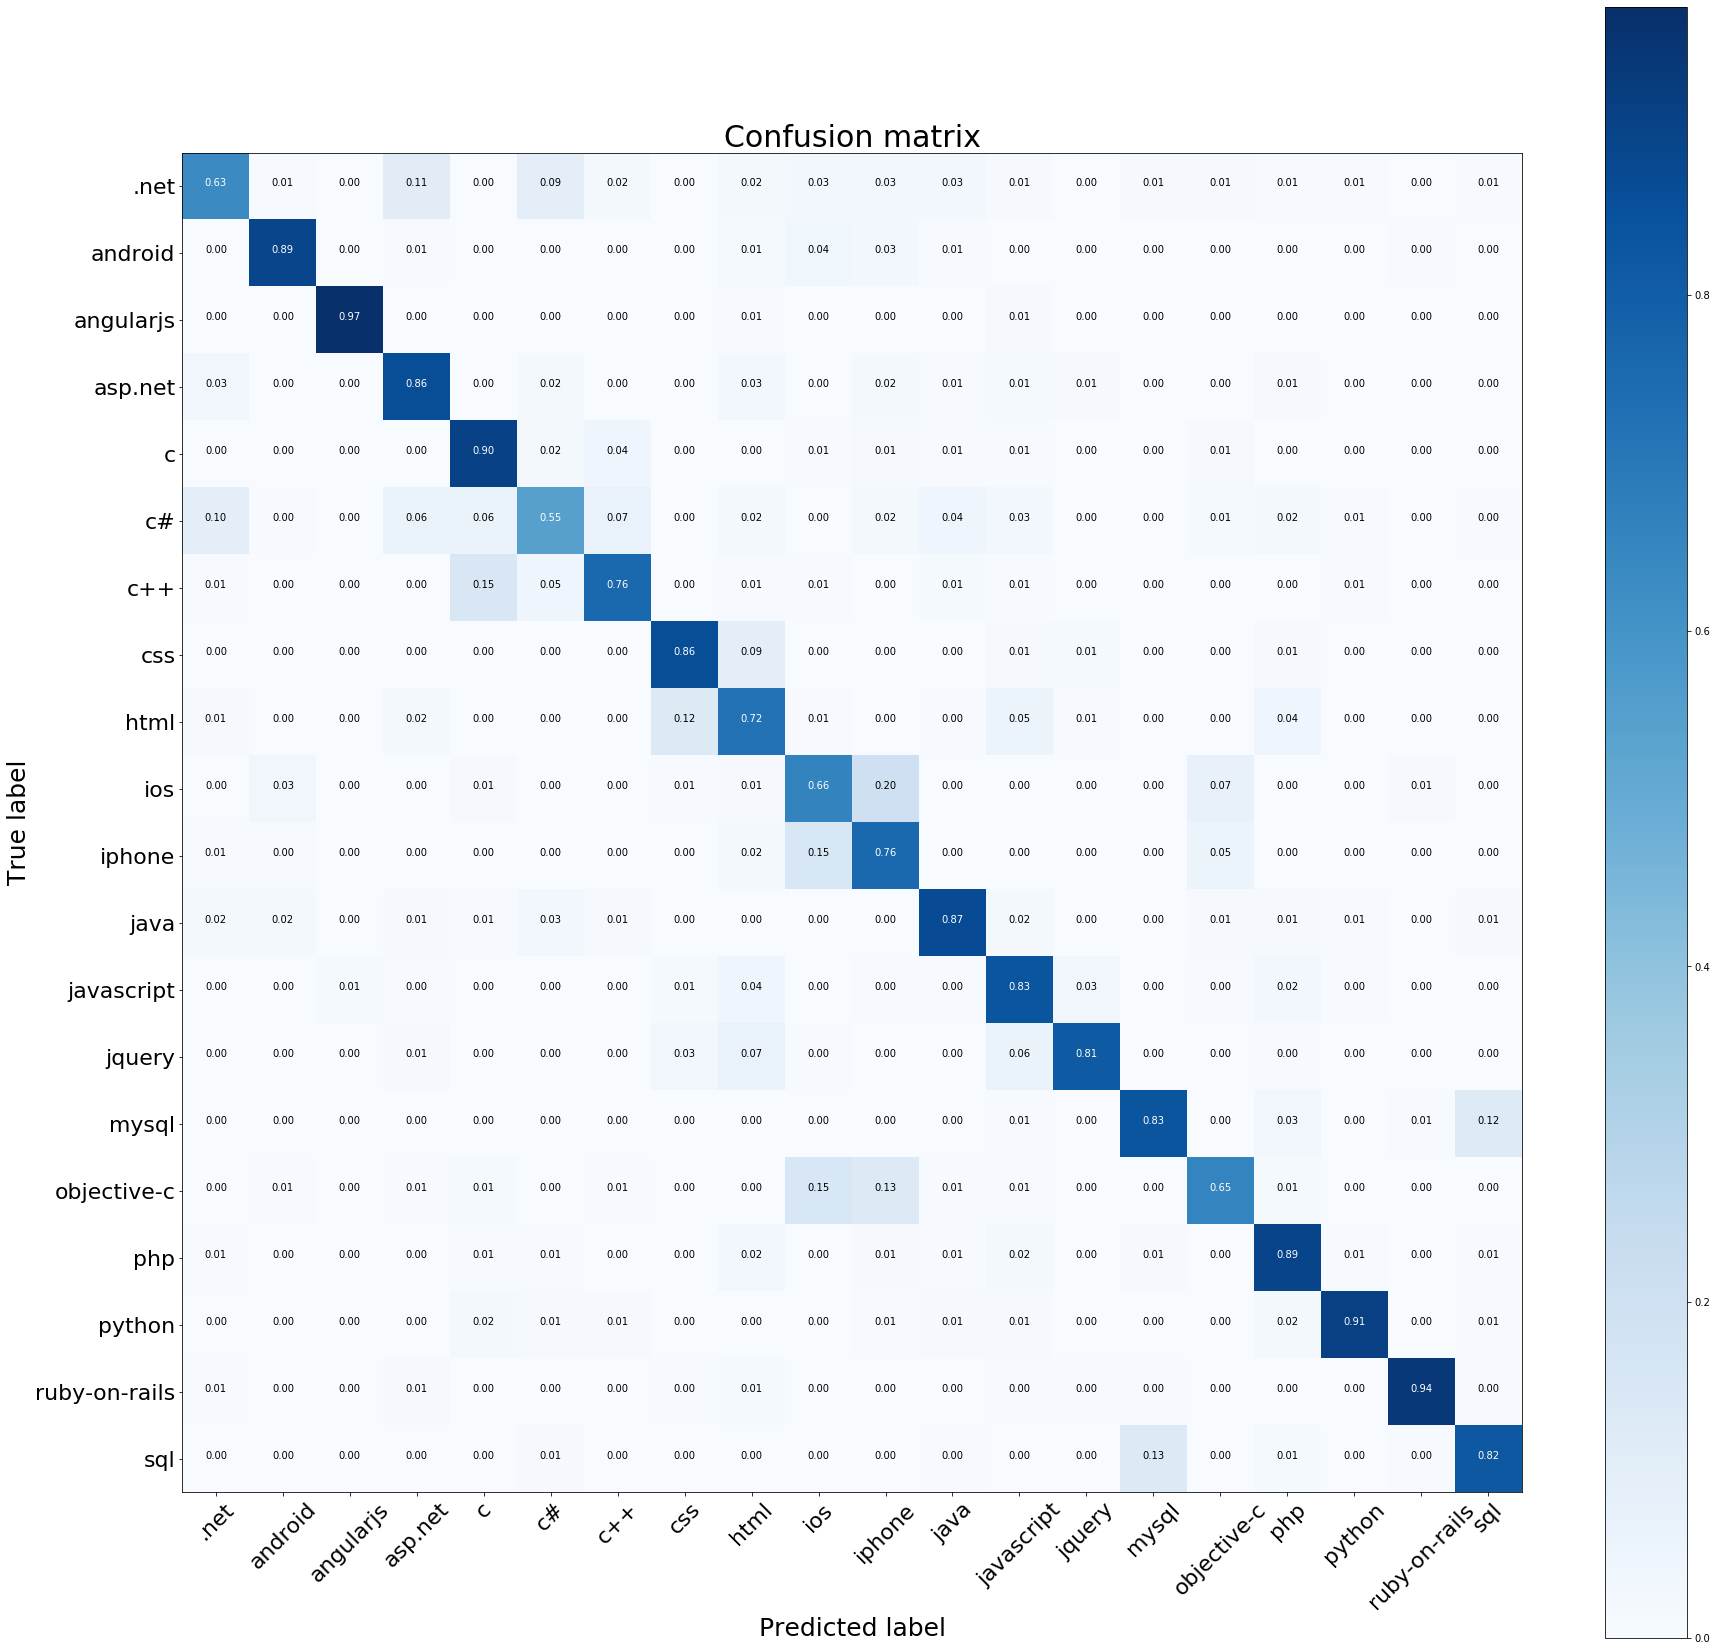

In [27]:
cnf_matrix = confusion_matrix(y_test_1d, y_pred_1d)
plt.figure(figsize=(30,30))
plot_confusion_matrix(cnf_matrix, classes=text_labels, title="Confusion matrix")
plt.show()

## Tableau Preprocessing Code: 

Assign each text post a random (x,y) coordinate given its associated true and predicted label.


In [0]:
Tableau_csv = pd.DataFrame()

Tableau_csv["Post"] = test_posts

Tableau_csv["True"] = y_test_1d
Tableau_csv["Predicted"] = y_pred_1d

Tableau_csv["True Label"] = encoder.inverse_transform(y_test_1d)
Tableau_csv["Predicted Label"] = encoder.inverse_transform(y_pred_1d)

In [0]:
def random_xyPredicted(label_num,eps=0.05):
    label_num = int(label_num)
    return np.random.uniform(label_num+eps,label_num+1-eps,1)[0]

def random_xyTrue(label_num,number_classes=len(encoder.classes_),eps=0.05):
    label_num = int(label_num)
    r = np.random.uniform(label_num+eps,label_num+1-eps,1)[0]
    return (r-number_classes)*-1

In [0]:
Tableau_csv["Predicted_XY"] = Tableau_csv["Predicted"].apply(random_xyPredicted)
Tableau_csv["True_XY"] = Tableau_csv["True"].apply(random_xyTrue)

In [85]:
Tableau_csv.head(10)

,Post,True,Predicted,True Label,Predicted Label,Predicted_XY,True_XY
32000,jquery( tr_selector ) is removing the style va...,13,13,jquery,jquery,13.882395,6.186856
32001,web reference in wcf in wcf if we use webrefe...,0,3,.net,asp.net,3.241259,19.303182
32002,fragment transaction custom animation - androi...,1,1,android,android,1.168709,18.503870
32003,why can i not use the namespace directive in c...,6,6,c++,c++,6.786057,13.432825
32004,generating password reset link in c# .net i m...,0,0,.net,.net,0.725797,19.645841
32005,php 5.3 $this versus php 5.4 i am calling a m...,16,16,php,php,16.624664,3.360699
32006,undefined method `request_uri actiondispatch ...,18,18,ruby-on-rails,ruby-on-rails,18.740825,1.176930
32007,my table view is not showing data i am using ...,10,10,iphone,iphone,10.922200,9.622606
32008,update panel not working correctly i have ad...,3,3,asp.net,asp.net,3.941501,16.367737
32009,floating objects in html is it possible to ma...,8,8,html,html,8.050018,11.738983


## Write to Google Sheets:

In [0]:
#!pip install --upgrade -q pygsheets

In [0]:
from google.colab import auth
auth.authenticate_user()
from gspread_dataframe import set_with_dataframe

import gspread
from oauth2client.client import GoogleCredentials

gc = gspread.authorize(GoogleCredentials.get_application_default())

In [0]:
# Create workbook if not already created
#gc.create('Tableau_CSV')

In [0]:
worksheet = gc.open('Tableau_CSV').sheet1
set_with_dataframe(worksheet, Tableau_csv,include_index=True) 